In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#Chargement d'une matrice de pixels
image = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png") # charge le fichier dans une matrice de pixels couleur
print(matrice.shape)              # les dimensions de la matrice


#Visualisation de la matrice avec matplotlib
#plt.imshow(matrice[..., ::-1])  #-1 car matplotlib utilise le systeme RVB alors que OpenCv utilise BRV. Il faut donc d'abord convertir en RVB
#plt.show()

#Visualisation de la matrice avec OpenCV
cv.imshow("Lenna",image)
cv.waitKey(0)
cv.destroyAllWindows()

(512, 512, 3)


[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   45    0    0
    0  388    0    0 1171    0    0    0 2211    0    0 3583    0    0
 5472    0    0 6460    0 5922    0    0 5104    0 4325    0 3100    0
 2479    0 2093    0 1730    0 1566    0 1469    0 1377    0 1345    0
 1335 1367    0 1416    0 1479 1468    0 1465 1438    0 1328 1431    0
 1465 1504    0 1522 1564 1605    0 1674 1604 1741    0 1774 2021 2398
 2598    0 2673 2588 2403 2126 2027 1730 1676    0 1554 1522 1510 1529
 1579 1536 1603 1542 1719 1795 1851 1796 1919 1916 2022 2198 2409 2650
 2626 2629 2685 2411 4435 1980 1930 1925 1939 2058 2237 4821 2411 2506
 2411 2507 4627 2240 2277 2

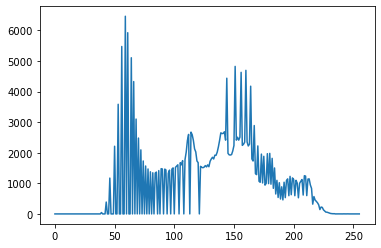

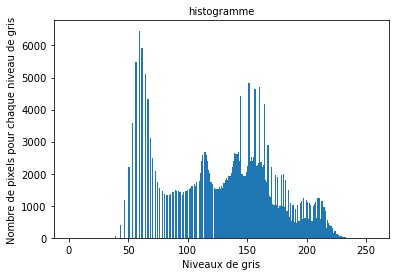

In [9]:
y = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png", 0)
print(y)

cv.imshow("Matrice de pixels gris", y)
cv.waitKey(0)
cv.destroyAllWindows() 

# Calcul de l'histogramme de l'image
hist = np.zeros(256, int)       # vecteur de 256 zéros (pour chaque gris)
for i in range(0,image.shape[0]):      # énumère les lignes
    for j in range(0,image.shape[1]):  # énumère les colonnes
        hist[y[i,j]] += 1

print(hist)
plt.plot(hist)
plt.show()

plt.hist(y.ravel(),256,[0,256])
plt.title("histogramme",fontsize=10)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

In [11]:
#Trouvons les niveaux de gris extrêmes présents dans l'image (ie les niveaux de gris min et max utilisées par l'image)
extr = list()
for i in range(0,hist.size):
    if hist[i] != 0:
        extr.append(i)
#print (extr)        
a,b = extr[0],extr[-1]

print('le min des niveaux de gris est {0:d} et le max est {1:d}'.format(a,b))
print("a=",a,"et b=",b)

le min des niveaux de gris est 39 et le max est 245
a= 39 et b= 245


[[160 160 159 ... 168 152 122]
 [160 160 159 ... 168 152 122]
 [160 160 159 ... 168 152 122]
 ...
 [ 17  17  24 ...  94  90  92]
 [ 17  17  30 ...  96  97 102]
 [ 17  17  30 ...  96  97 102]]
[  45    0    0    0  388    0    0    0 1171    0    0    0    0 2211
    0    0    0 3583    0    0    0 5472    0    0 6460    0    0 5922
    0    0 5104    0    0 4325    0 3100    0    0 2479    0 2093    0
    0 1730    0 1566    0    0 1469    0 1377    0    0 1345    0 1335
 1367    0    0 1416    0 1479    0 1468    0 1465 1438    0    0 1328
 1431    0    0 1465 1504    0 1522 1564    0 1605    0 1674 1604    0
 1741    0 1774 2021    0 2398 2598    0 2673    0 2588 2403 2126 2027
    0 1730 1676    0 1554 1522    0 1510 1529 1579 1536    0 1603 1542
 1719 1795    0 1851 1796 1919 1916    0 2022 2198 2409 2650    0 2626
 2629 2685 2411 4435    0 1980 1930 1925 1939    0 2058 2237 4821 2411
    0 2506 2411 2507 4627    0 2240 2277 2346 4692    0 2352 2221 2278
 4174 1798    0 1729 2888 1

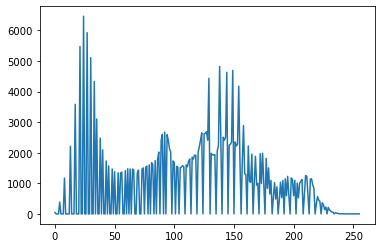

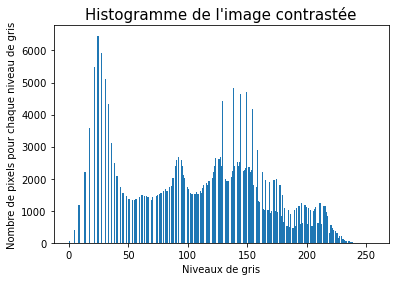

In [12]:
#Recadrage de dynamique : contraste 
#A un niveau de gris f de l'image originelle correspond le niveau t(f) dans l'image transformée 
# Notre fonction de contraste sera définie comme suit: 

def contrast(a,b,y):     # y est la matrice des niveaux de gris
    y_new = np.zeros((image.shape[0],image.shape[1]),np.uint8)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            if y[i,j]<a:
                y_new[i,j]=0
            elif y[i,j]>b:
                y_new[i,j]=255
            else:
                y_new[i,j]=255*(y[i,j]-a)/(b-a)
    return (y_new)

y = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png", 0)
A = contrast(39,245,y)
print(A)

#Nouvel histogramme
hist_new = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,y.shape[0]):      # énumère les lignes
    for j in range(0,y.shape[1]):  # énumère les colonnes
        hist_new[A[i,j]] += 1

print(hist_new)
plt.plot(hist_new)
plt.show()

plt.hist(A.ravel(),256,[0,256])
plt.title("Histogramme de l'image contrastée", fontsize=15)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

In [13]:
#Trouvons les niveaux de gris extrêmes présents dans l'image contrastée (ie les niveaux de gris min et max utilisées par l'image)
extr = list()
for i in range(0,hist_new.size):
    if hist_new[i] != 0:
        extr.append(i)
#print (extr)        
a,b = extr[0],extr[-1]

print('le min des niveaux de gris est {0:d} et le max est {1:d}'.format(a,b))

le min des niveaux de gris est 0 et le max est 255


On voit que dans l'image contrastée, tous les niveaux de gris ont été utilisés, ce qui est le résultat attendu.

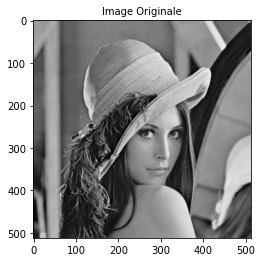

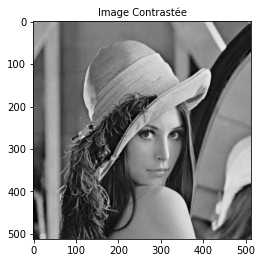

In [14]:
#Affichage des images contrastrée et originelle

#Matrice originelle
plt.imshow(y, cmap = "gray" )   # affiche la matrice de niveaux de gris
plt.title("Image Originale",fontsize=10)
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

cv.imshow("Image Originale",y)


#Matrice contrastée
plt.imshow(A, cmap = "gray" )   # affiche la matrice de niveaux de gris contrastée
plt.title("Image Contrastée",fontsize=10)
plt.show() # ouvre la fenêtre d’affichage et attend la fin de l’interaction utilisateur

cv.imshow("Image Contrastee",A)
cv.waitKey(0)
cv.destroyAllWindows() 

[[250 250 250 ... 250 249 248]
 [250 250 250 ... 250 249 248]
 [250 250 250 ... 250 249 248]
 ...
 [162 162 180 ... 247 246 246]
 [162 162 196 ... 247 247 247]
 [162 162 196 ... 247 247 247]]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0    45
     0     0     0     0     0     0     0     0     0     0     0   388
     

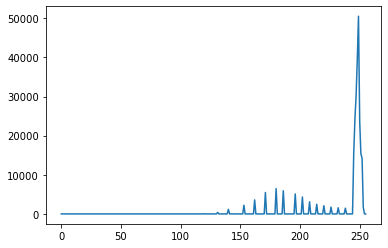

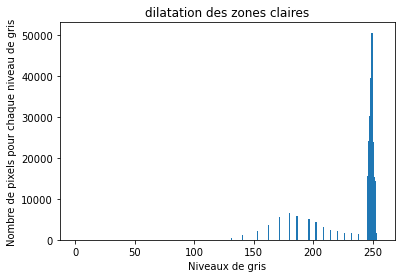

In [16]:
#rehaussement des contrastes

def r_contrast(a,b,y):  # y est la matrice des niveaux de gris
    y_rc = np.zeros((image.shape[0],image.shape[1]),np.uint8)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            if (y[i,j]>=0 and y[i,j]<=a):    
                y_rc[i,j]=((b*y[i,j])/a)
            elif (y[i,j]>=a and y[i,j]<=255):
                y_rc[i,j]=((255-b)*y[i,j]+255*(b-a))/(255-a)
            else:
                y_rc[i,j]=y[i,j]
    return(y_rc)

#v = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/chat.jpg", 0)
v = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png", 0)

#dilatation de la dynamique des zones claires avec a = 80 et B = 245
B = r_contrast(80,245,v)    
print(B)
## Nouvel histogramme et affichage des images

hist_hc = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,image.shape[0]):      # énumère les lignes
    for j in range(0,image.shape[1]):  # énumère les colonnes
        hist_hc[B[i,j]] += 1

print(hist_hc)
plt.plot(hist_hc)
plt.show()

plt.hist(B.ravel(),256,[0,256])
plt.title("dilatation des zones claires",fontsize = 12)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

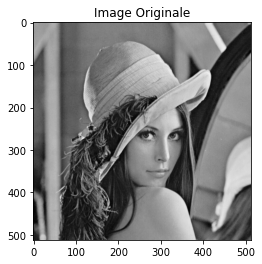

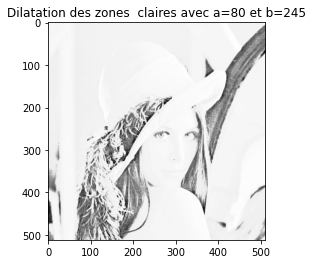

In [17]:
#Affichage de la matrice de rehaussement de contraste

plt.imshow(y, cmap = "gray" )   # affiche la matrice de niveaux de gris 
plt.title("Image Originale")
plt.show() 

cv.imshow("Image Originale",y)

plt.imshow(B, cmap = "gray" ) # affiche la matrice avec dilatation des zones claires
plt.title("Dilatation des zones  claires avec a=80 et b=245")
plt.show() 

cv.imshow("Dilatation des zones claires",B)
cv.waitKey(0)
cv.destroyAllWindows() 

[[60 60 58 ... 73 44 34]
 [60 60 58 ... 73 44 34]
 [60 60 58 ... 73 44 34]
 ...
 [13 13 14 ... 28 28 28]
 [13 13 16 ... 29 29 30]
 [13 13 16 ... 29 29 30]]
[    0     0     0     0     0     0     0     0     0    45   388  1171
  2211  3583 11932  5922  9429  5579  3823  3035  2722  4118  2947  4231
  4400  4691  5019  6193  7859  8286  4752  6154  6659  7482  9279 10351
 10270 11055  9835 11490  4692     0  2352     0  2221     0  2278     0
     0  4174     0  1798     0  1729     0  2888     0     0  1316     0
  1285     0  2222     0  1066     0     0  1035     0  1955     0  1012
     0  1883     0     0   941     0   998     0  1969     0     0   990
     0  1979     0   971     0  1816     0     0   836     0  1502     0
   651     0  1097     0     0   538     0  1020     0   487     0   886
     0     0   458     0  1036     0   532     0  1093     0     0  1145
     0   595     0  1227     0     0   628     0  1176     0  1129     0
   595     0     0  1098     0  1009     

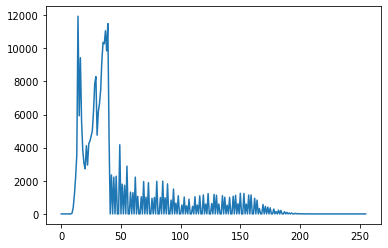

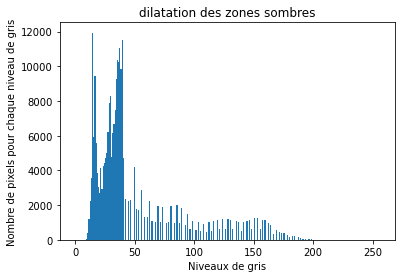

In [18]:
#dilatation de la dynamique des zones sombres avec a = 160 et b = 40

C = r_contrast(160,40,v)    
print(C)
## Nouvel histogramme et affichage des images

hist_hc = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,image.shape[0]):      # énumère les lignes
    for j in range(0,image.shape[1]):  # énumère les colonnes
        hist_hc[C[i,j]] += 1

print(hist_hc)
plt.plot(hist_hc)
plt.show()

plt.hist(C.ravel(),256,[0,256])
plt.title("dilatation des zones sombres",fontsize = 12)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

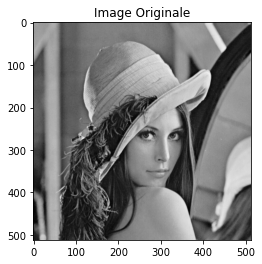

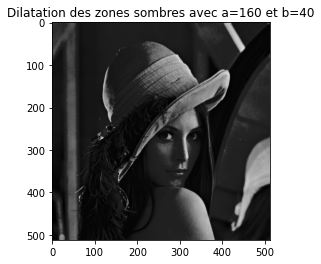

In [19]:
#Affichage de la matrice de rehaussement de contraste

plt.imshow(y, cmap = "gray" )   # affiche la matrice de niveaux de gris 
plt.title("Image Originale")
plt.show() 

cv.imshow("Image Originale",y)

plt.imshow(C, cmap = "gray" ) # affiche la matrice avec dilatation des zones sombres
plt.title("Dilatation des zones sombres avec a=160 et b=40")
plt.show() 

cv.imshow("Dilatation des zones sombres",C)
cv.waitKey(0)
cv.destroyAllWindows() 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   45    0    0
    0  388    0    0 1171    0    0    0 2211    0    0 3583    0    0
 5472    0    0 6460    0 5922    0    0 5104    0 4325    0 3100    0
 2479    0 2093    0 1730    0 1566    0 1469    0 1377    0 1345    0
 1335 1367    0 1416    0 1479 1468    0 1465 1438    0 1328 1431    0
 1465 1504    0 1522 1564 1605    0 1674 1604 1741    0 1774 2021 2398
 2598    0 2673 2588 2403 2126 2027 1730 1676    0 1554 1522 1510 1529
 1579 1536 1603 1542 1719 1795 1851 1796 1919 1916 2022 2198 2409 2650
 2626 2629 2685 2411 4435 1980 1930 1925 1939 2058 2237 4821 2411 2506
 2411 2507 4627 2240 2277 2346 4692 2352 2221 2278 4174 1798 1729 2888
 1316 1285 2222 1066 1035 1955 1012 1883  941  998 1969  990 1979  971
 1816  836 1502  651 1097  538 1020  487  886  458 1036  532 1093 1145
  595 

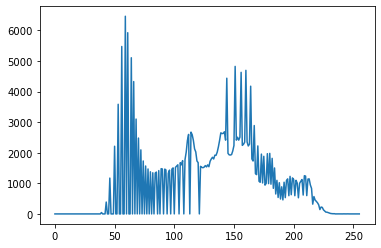

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.37736511e-02
 4.37736511e-02 4.37736511e-02 4.37736511e-02 4.21199799e-01
 4.21199799e-01 4.21199799e-01 1.56028748e+00 1.56028748e+00
 1.56028748e+00 1.56028748e+00 3.71103287e+00 3.71103287e+00
 3.71103287e+00 7.19638824e+00 7.19638824e+00 7.19638824e+00
 1.25192642e+01 1.25192642e+01 1.25192642e+01 1.88032150e+01
 1.88032150e+01 2.45638275e+01 2.45638275e+01 2.45638275e+01
 2.95287323e+01 2.952873

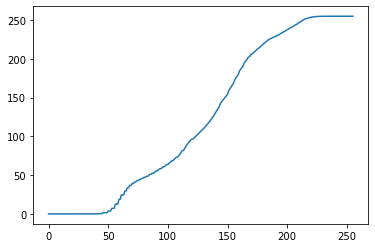

[[203 203 202 ... 212 188 125]
 [203 203 202 ... 212 188 125]
 [203 203 202 ... 212 188 125]
 ...
 [  7   7  18 ...  86  81  84]
 [  7   7  29 ...  91  93  98]
 [  7   7  29 ...  91  93  98]]


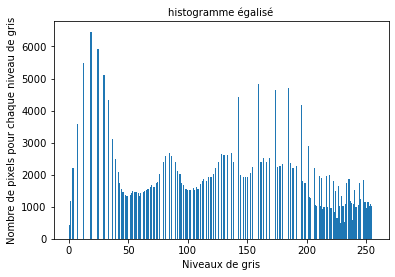

In [20]:
###Egalisation de l'histogramme
image = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png")
y = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png",0)     

# Calcule l'histogramme de l'image
histo = np.zeros(256, int)      # prépare un vecteur de 256 zéros
for i in range(0,image.shape[0]):       # énumère les lignes
    for j in range(0,image.shape[1]):   # énumère les colonnes
        histo[y[i,j]] = histo[y[i,j]] + 1
print(histo)
plt.plot(histo)
plt.show()

# Calcule l'histogramme cumulé hc
hc = np.zeros(256, int)         # prépare un vecteur de 256 zéros
hc[0] = histo[0]
for i in range(1,256):
    hc[i] = histo[i] + hc[i-1]

# Normalise l'histogramme cumulé
nbpixels = y.size
hc = (hc / nbpixels) * 255
print(hc)
plt.plot(hc)
plt.show()

# Utilise hc comme table de conversion des niveaux de gris
for i in range(0,y.shape[0]):       # énumère les lignes
    for j in range(0,y.shape[1]):   # énumère les colonnes
        y[i,j] = hc[y[i,j]]
print(y)        
cv.imshow("Image après égalisation", y)
plt.hist(y.ravel(),256,[0,256])

plt.title("histogramme égalisé", fontsize=10)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

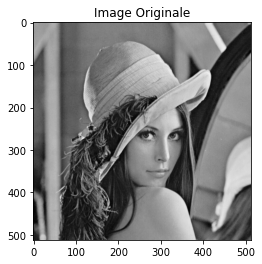

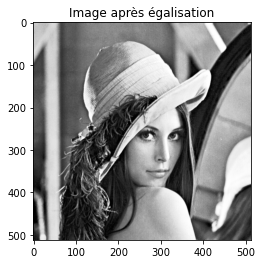

In [21]:
#Affichage de l'image égalisée
matG = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png",0)
plt.imshow(matG, cmap = "gray" )   # affiche la matrice de niveaux de gris 
plt.title("Image Originale")
plt.show() 

cv.imshow("Image Originale",matG)

plt.imshow(y, cmap = "gray" )   # affiche la matrice après égalisation
plt.title("Image après égalisation")
plt.show() 

cv.imshow("Image apres egalisation", y)
cv.waitKey(0)
cv.destroyAllWindows()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


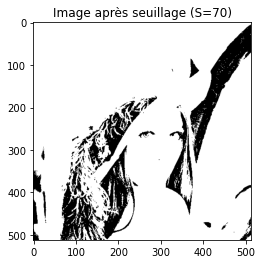

[ 40260      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

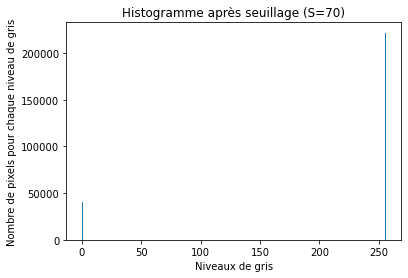

In [22]:
###Binarisation-seuillage
#Le but de la binarisation d’une image est d’affecter un niveau uniforme aux pixels pertinents et d’éliminer les autres.
#Le seuillage consiste à affecter le niveau 255 aux pixels dont la valeur est supérieure à un seuil S et le niveau 0 aux autres.

def seuillage(S,y):    #Q: Sur quoi se base t-on pour choisir le seuil?
    y_seuil =  np.zeros((image.shape[0],image.shape[1]),np.uint8)
    for i in range(0,y.shape[0]):
        for j in range(0,y.shape[1]):
            if (y[i,j]>S):
                y_seuil[i,j] = 255
            else :
                y_seuil[i,j] = 0
    return (y_seuil)

y = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png",0)
D = seuillage (70,y)
print(D)

plt.imshow(D, cmap="gray")
plt.title("Image après seuillage (S=70)")
plt.show()

cv.imshow("Image apres seuillage (S=70)",D)
cv.waitKey(0)
cv.destroyAllWindows() 

# Histogramme
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,image.shape[0]):      # énumère les lignes
    for j in range(0,image.shape[1]):  # énumère les colonnes
        hist[D[i,j]] += 1

print(hist)
plt.hist(D.ravel(),256,[0,256])
plt.title("Histogramme après seuillage (S=70)",fontsize = 12)
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels pour chaque niveau de gris")
plt.show()

In [23]:
#Détermination automatique de la valeur du seuillage en maximisant la variance intraclasse

import numpy as np
import cv2 as cv

img = cv.imread("D:/Master_IM/Cours_S2/Projet_Traitement_dImages/Lenna.png",cv.IMREAD_GRAYSCALE)
fenetre = 'Image binaire OTSU'
cv.namedWindow(fenetre)
thresh,imgbin=cv.threshold(img,0,255,cv.THRESH_OTSU)
cv.imshow(fenetre,imgbin)
print( 'Valeur seuil OTSU ', thresh)
cv.waitKey(0)
cv.destroyAllWindows()


Valeur seuil OTSU  124.0


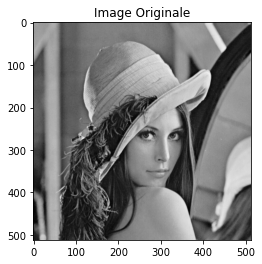

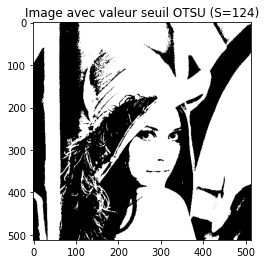

In [24]:
#Affichage de l'image après seuillage

plt.imshow(img,cmap = "gray" )   # affiche la matrice de niveaux de gris
plt.title("Image Originale")
plt.show() 

cv.imshow("Image Originale",img)

plt.imshow(imgbin, cmap = "gray" )   # affiche la matrice après seuillage
plt.title("Image avec valeur seuil OTSU (S=124)")
plt.show() 

cv.imshow("Image avec valeur seuil OTSU (S=124)",imgbin)
cv.waitKey(0)
cv.destroyAllWindows() 
